In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
#Use "-1" for CPU-only devices

#If working on GPU enviroment
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
#Limit the memory allocated by tensorflow to only the necessary amount

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['PYTHONHASHSEED'] = '2'

In [2]:
import numpy as np
from numpy.random import seed
seed(18)

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.random import set_seed
from tensorflow.keras.utils import set_random_seed
set_seed(18)
set_random_seed(18)

import keras

import matplotlib.pyplot as plt

from Supporting_func_file import *

Version_check()

/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


All packages are using the targeted versions.


## Preparing the diatom data
#### Loading the data

In [3]:
file_path = "Data_sets/Scan_Diatom/Diatom_data.npz"

counts_diatom, counts_background = Load_data_file(file_path)
#Loading the scan counts for both cases - present diatom and background

#### Pre-processing the data

In [4]:
counts_diatom_normed = Probability_norm(counts_diatom)
counts_background_normed = Probability_norm(counts_background)
#Normalization, sum(count distribution)=1 for each bin

#Note: The diatom scan contains only 6 count channels. At the measurement time, we only had 6 available single-photon detectors.

## Evaluation

In [5]:
#Loading the model
model = load_model("Trained_models/Scan_Diatom_model.h5", 
                   custom_objects={"fidelity_metric": fidelity_metric})

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               1750      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 batch_normalization (BatchN  (None, 250)              1000      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 250)               62750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 250)              1000      
 hNormalization)                                        

In [6]:
predicted_states_diatom_rho = Flat_to_Density(model.predict(counts_diatom_normed))
predicted_states_background_rho = Flat_to_Density(model.predict(counts_background_normed))
#Predicted polarization states in the form of coherence matrices

predicted_states_diatom_bloch = Rho_to_Stokes(predicted_states_diatom_rho)
predicted_states_background_bloch = Rho_to_Stokes(predicted_states_background_rho)
#Predicted polarization states in the form of normalized Stokes parameters, i.e., Bloch parameters

3/3 [==============================] - 0s 1ms/step


## Plotting

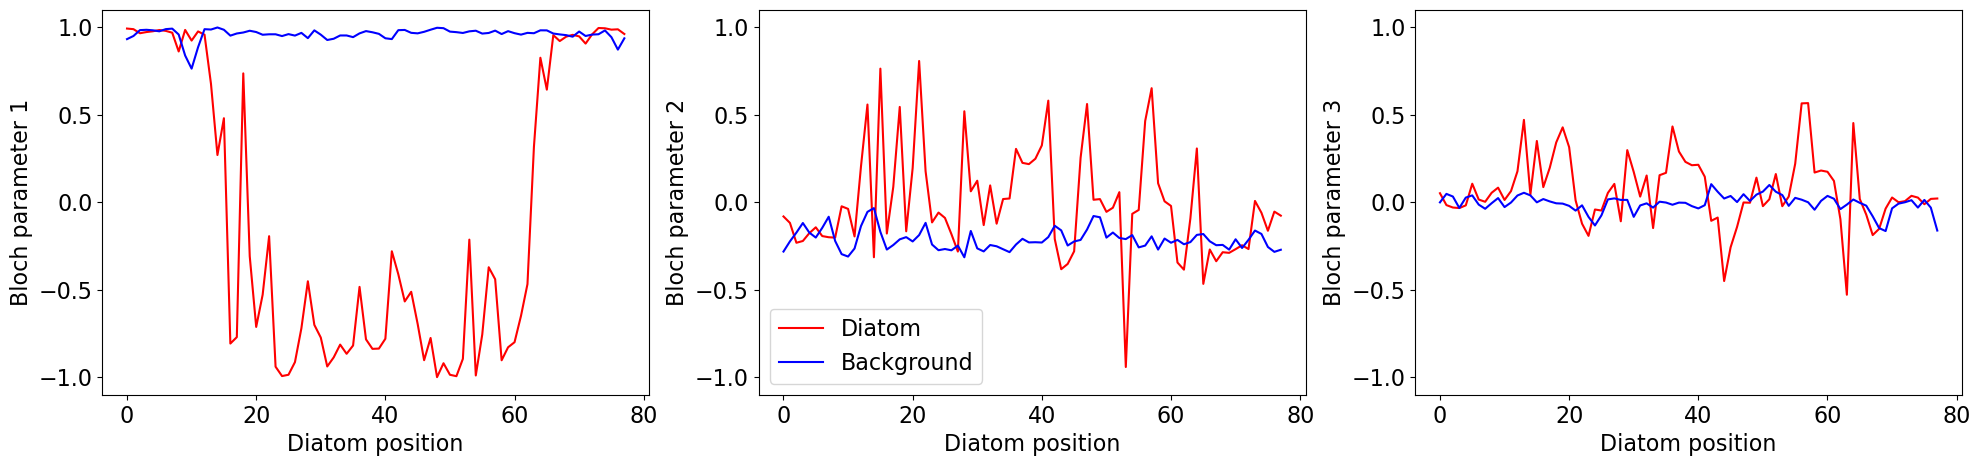

In [7]:
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=16)

plt.figure(figsize=(24,5))
plt.subplot(131)
plt.plot(predicted_states_diatom_bloch[:,0], color="red", label="Diatom")
plt.plot(predicted_states_background_bloch[:,0], color="blue", label="Background")


plt.ylim(top=1.1, bottom=-1.1)
plt.xlabel("Diatom position")
plt.ylabel("Bloch parameter 1")

plt.subplot(132)
plt.plot(predicted_states_diatom_bloch[:,1], color="red", label="Diatom")
plt.plot(predicted_states_background_bloch[:,1], color="blue", label="Background")

plt.legend()
plt.ylim(top=1.1, bottom=-1.1)
plt.xlabel("Diatom position")
plt.ylabel("Bloch parameter 2")

plt.subplot(133)
plt.plot(predicted_states_diatom_bloch[:,2], color="red", label="Diatom")
plt.plot(predicted_states_background_bloch[:,2], color="blue", label="Background")

plt.ylim(top=1.1, bottom=-1.1)
plt.xlabel("Diatom position")
plt.ylabel("Bloch parameter 3")

plt.show()